In [50]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
# import dedalus.public as d3 #wow, I just had to call it dedalus.public
# Had been writing dedalus3 and assuming there were actual errors with jupyter notebook launch
# since it always makes so many complaints
# Well now I'm just going to ignore the remaining jupyter notebook weirdness

In [141]:
df = h5py.File("scratchNoParity/checkpoints2/checkpoints2_s39.h5",'r')

In [105]:
df0 = h5py.File("scratchNoParity/checkpoints2/checkpoints2_s1.h5",'r')

In [149]:
df_fields = h5py.File("scratchRm100/fields_two/fields_two_s1.h5",'r')

In [84]:
lnrho = df['tasks/lnrho'][:]

In [78]:
rho_fields = df_fields['tasks/rho'][:]

In [79]:
df['tasks'].keys()

<KeysViewHDF5 ['A', 'T', 'lnrho', 'phi', 'tau_A', 'v']>

In [150]:
df_fields['tasks'].keys()

<KeysViewHDF5 ['B', 'T', 'j', 'rho', 'v']>

In [57]:
rho = np.exp(lnrho)

In [58]:
rho.min()

0.011121387169404001

In [59]:
lnrho.min()

-4.498885252489767

In [60]:
lnrho.max()

0.00956798397056391

In [61]:
rho_fields.min()

-0.03734503514632603

In [85]:
df['scales/sim_time'][:]

array([0.07910443, 0.07964518, 0.08022222, 0.08079925, 0.08137629,
       0.08195332, 0.08253036, 0.08310739, 0.08368443, 0.08426146])

In [70]:
df_fields['scales/sim_time'][:]

array([0.        , 0.10041842])

In [71]:
df['scales/iteration'][:]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [65]:
df_fields['scales/iteration'][:]

array([  0, 227])

In [66]:
#with "h5py.file()" as file:
#    file.(whatever)
#    data = file['tasks/...'']
# last line in with grouping closes file

In [107]:
logDensity = df['tasks/lnrho'][0,:,:,:]
logDensity0 = df0['tasks/lnrho'][0,:,:,:]

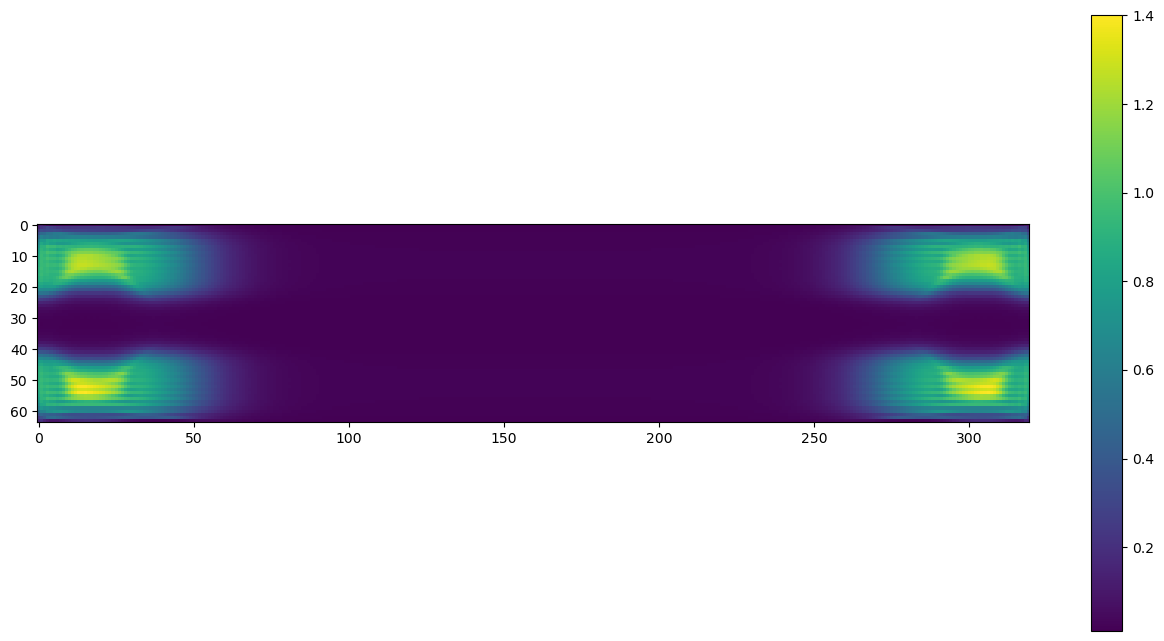

In [106]:
plt.figure(figsize=(16,8)) #make larger
plt.imshow(np.exp(logDensity[:,32,:])) #vmax = 0.01 #Can do np.exp, but log is much more illustrative right now.
# plt.imshow(np.exp(Density[:,1,:]))
plt.colorbar()

In [145]:
df0['tasks'].keys()


<KeysViewHDF5 ['A', 'T', 'lnrho', 'phi', 'tau_A', 'v']>

In [146]:
def plot_slices(df0, df1, field = "density",slicept=32,sliceaxis=1,compind=0):
    if field == "density":
        data0 = np.exp(df0['tasks/lnrho'][0,:,:,:])
        data1 = np.exp(df1['tasks/lnrho'][0,:,:,:])
    elif field == "v" or field == "A":
        data0 = df0[f'tasks/{field}'][0,compind,:,:,:]
        data1 = df1[f'tasks/{field}'][0,compind,:,:,:]
    else:
        data0 = df0[f'tasks/{field}'][0,:,:,:]
        data1 = df1[f'tasks/{field}'][0,:,:,:]
    data_slice = [slice(None),slice(None),slice(None)]
    data_slice[sliceaxis] = slicept
    data_slice = tuple(data_slice)
    plt.figure(figsize=(16,8)) #make larger
    plt.subplot(211)
    plt.imshow(data0[data_slice]) #vmax = 0.01 #Can do np.exp, but log is much more illustrative right now.
    plt.colorbar()
    plt.subplot(212)
    plt.imshow(data1[data_slice])
    plt.colorbar()
    plt.tight_layout()
    

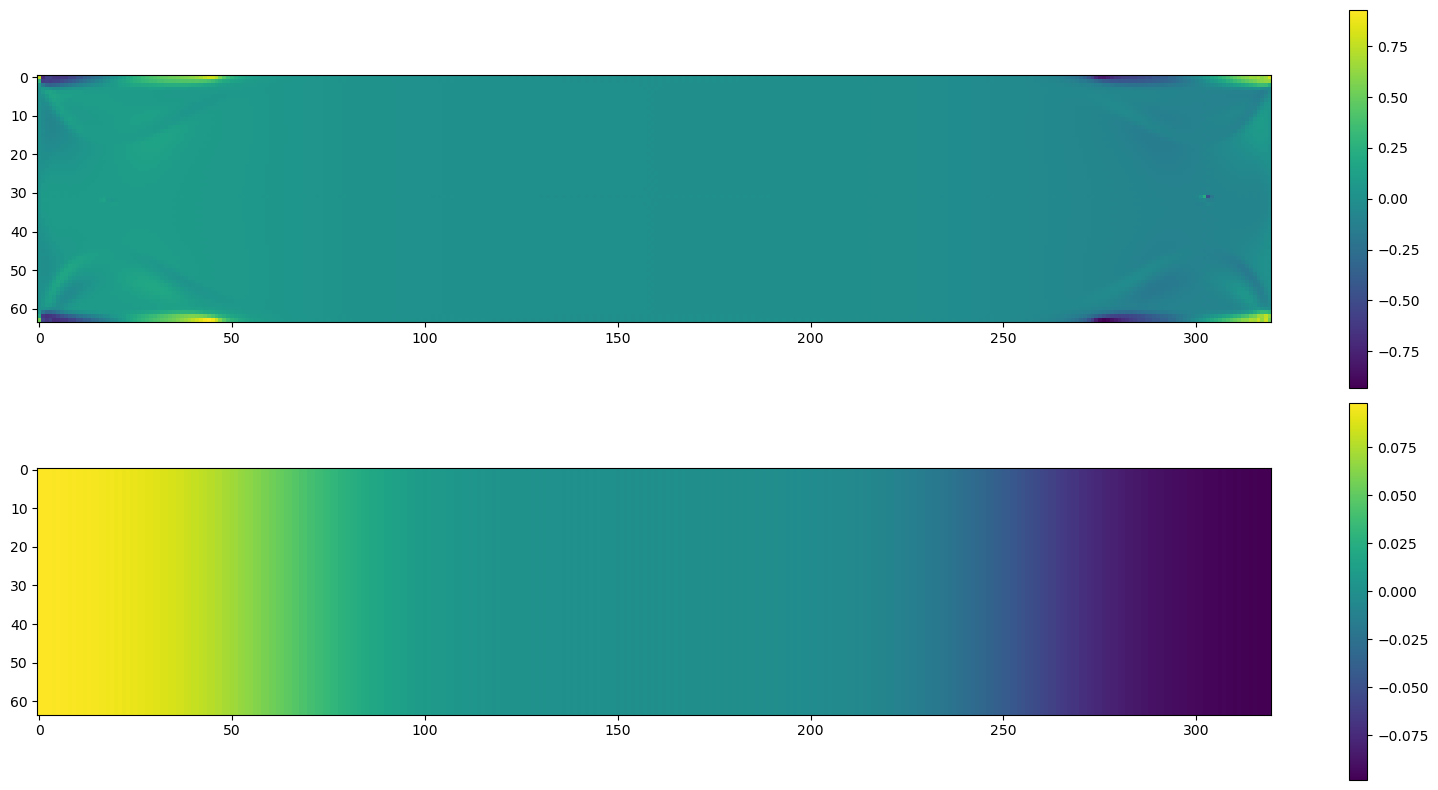

In [152]:
plot_slices(df, df0, field = "v", slicept=0,sliceaxis=1,compind=2)

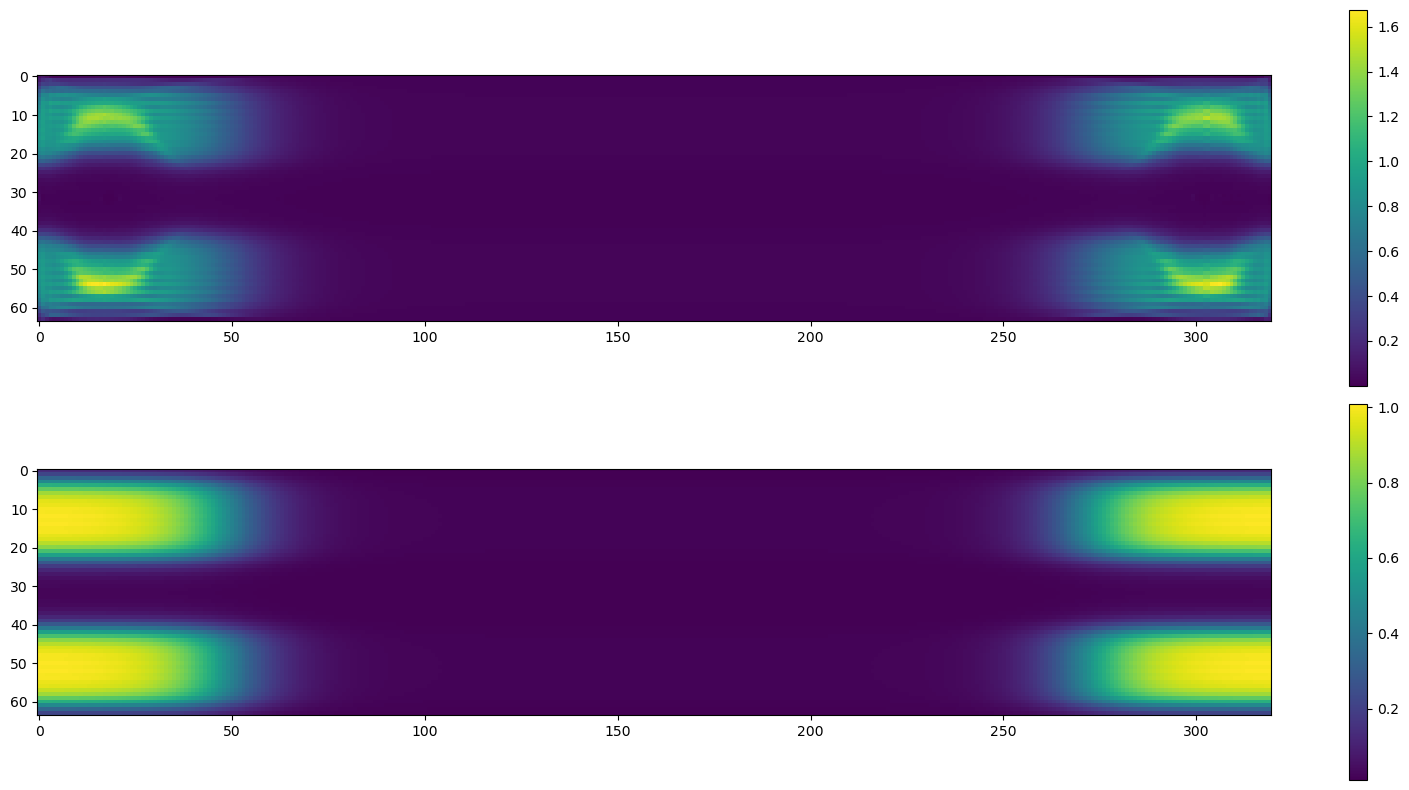

In [154]:
plot_slices(df, df0, field = "density", slicept=32,sliceaxis=1,compind=2)

In [ ]:
np.fft.fftn()

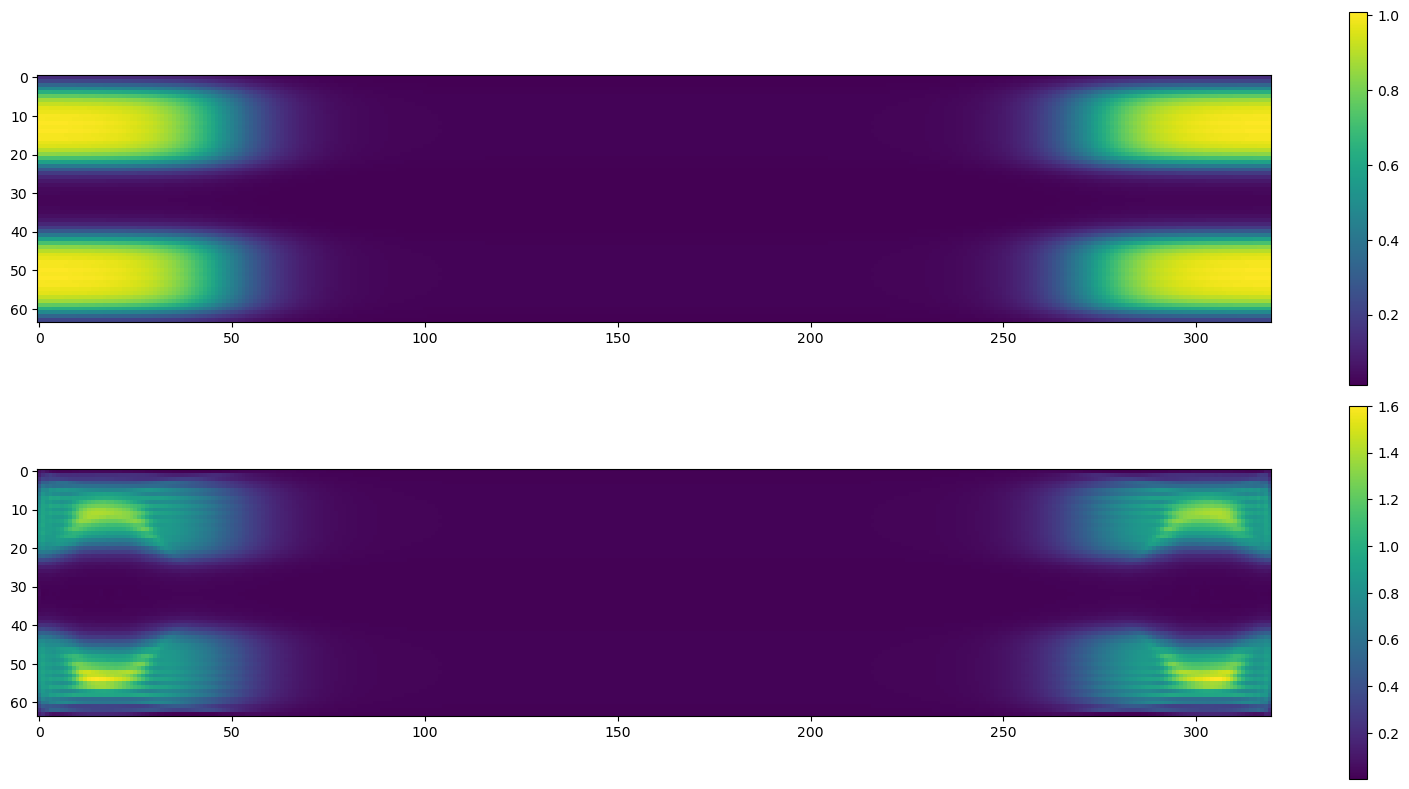

In [120]:
plt.figure(figsize=(16,8)) #make larger
plt.subplot(211)
plt.imshow(np.exp(Density0[:,32,:])) #vmax = 0.01 #Can do np.exp, but log is much more illustrative right now.
plt.colorbar()
plt.subplot(212)
plt.imshow(np.exp(Density[:,32,:]))
plt.colorbar()
plt.tight_layout()

In [27]:
density_fields = df_fields['tasks/rho'][0,:,:,:]

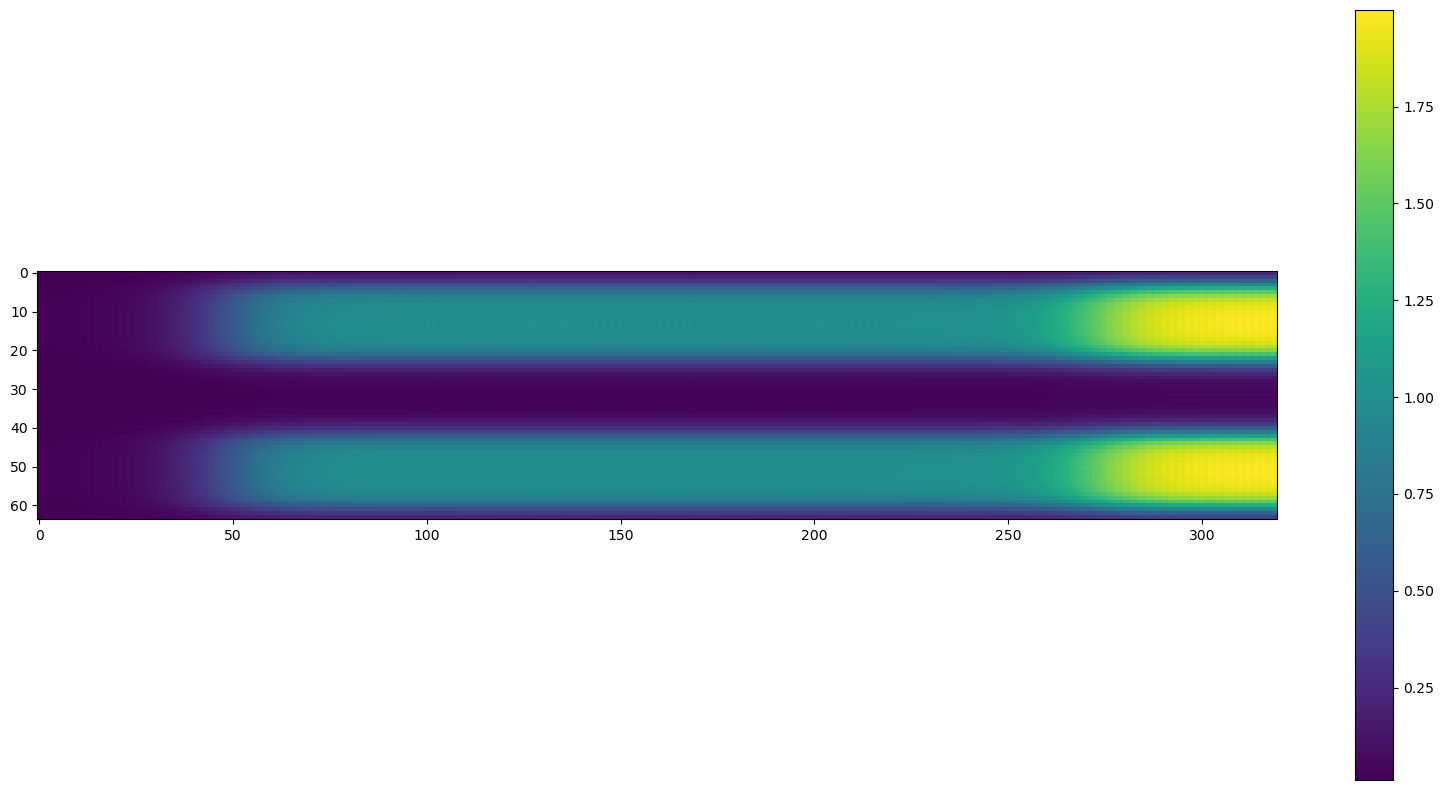

In [28]:
plt.figure(figsize=(20,10)) #make larger
plt.imshow(density_fields[:,31,:]) #vmax = 0.01
plt.colorbar()

In [97]:
Temp = df['tasks/T'][0,:,:,:]

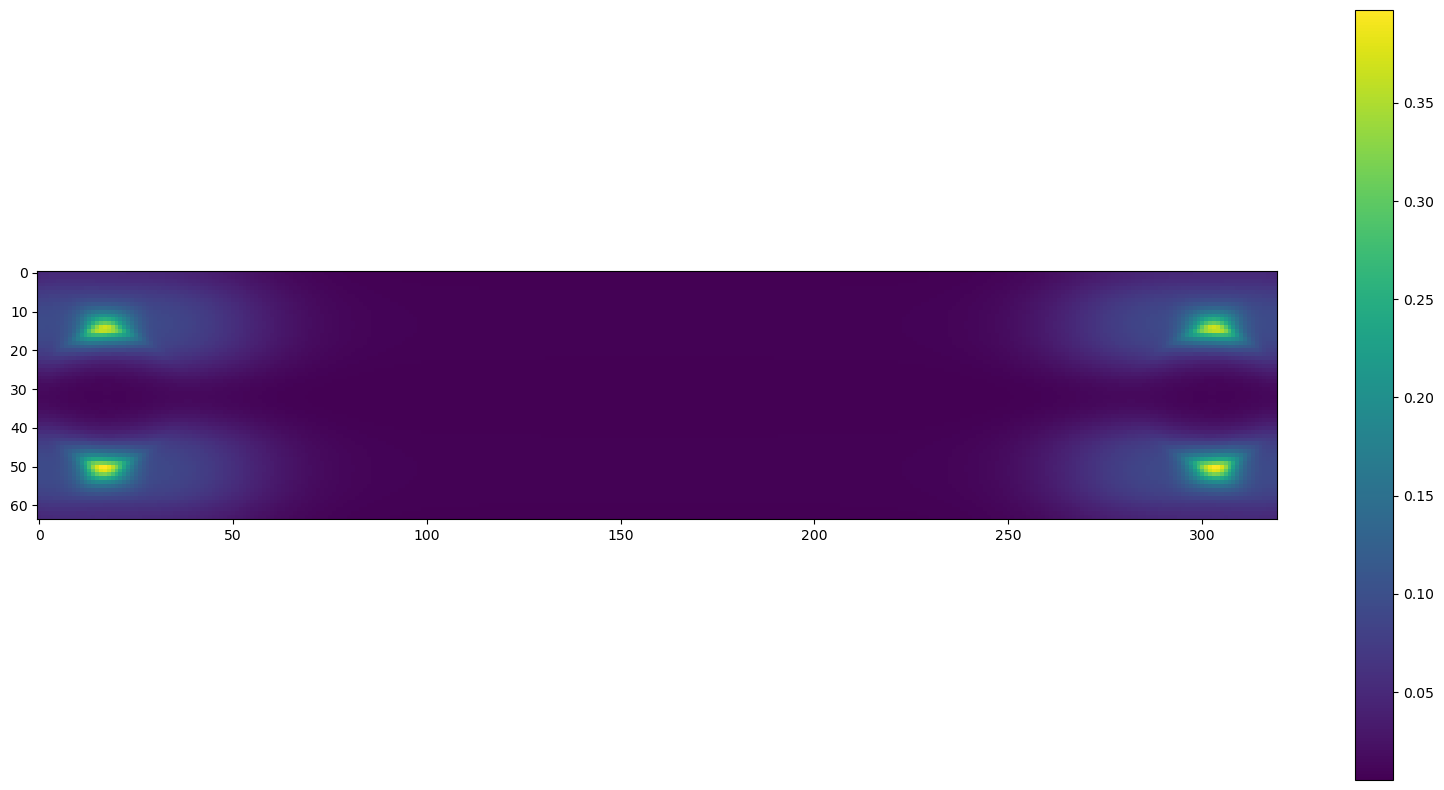

In [98]:
plt.figure(figsize=(20,10)) #make larger
plt.imshow(Temp[:,31,:]) #vmax = 0.01
plt.colorbar()

## np.exp(Density).min()

In [48]:
np.exp(Density).argmin() #turn this into 3D index - unravel, then slice in one of those directions to see plane where min is

1266880

In [49]:
T_fields = df_fields['tasks/T'][:]
T_fields.min()

0.004849631539734289

In [50]:
Temp.min()

0.004947617775148592

In [51]:
rho_fields.min()

-0.03570250750744641

In [80]:
df.close()
df_fields.close()